Epoch [1/50], Loss: 2.1352
Epoch [2/50], Loss: 1.5385
Epoch [3/50], Loss: 0.8354
Epoch [4/50], Loss: 0.4242
Epoch [5/50], Loss: 0.2526
Epoch [6/50], Loss: 0.1766
Epoch [7/50], Loss: 0.1342
Epoch [8/50], Loss: 0.1065
Epoch [9/50], Loss: 0.0862
Epoch [10/50], Loss: 0.0696
Epoch [11/50], Loss: 0.0576
Epoch [12/50], Loss: 0.0488
Epoch [13/50], Loss: 0.0412
Epoch [14/50], Loss: 0.0355
Epoch [15/50], Loss: 0.0305
Epoch [16/50], Loss: 0.0262
Epoch [17/50], Loss: 0.0236
Epoch [18/50], Loss: 0.0205
Epoch [19/50], Loss: 0.0179
Epoch [20/50], Loss: 0.0157
Epoch [21/50], Loss: 0.0140
Epoch [22/50], Loss: 0.0122
Epoch [23/50], Loss: 0.0111
Epoch [24/50], Loss: 0.0098
Epoch [25/50], Loss: 0.0091
Epoch [26/50], Loss: 0.0080
Epoch [27/50], Loss: 0.0074
Epoch [28/50], Loss: 0.0066
Epoch [29/50], Loss: 0.0061
Epoch [30/50], Loss: 0.0055
Epoch [31/50], Loss: 0.0051
Epoch [32/50], Loss: 0.0048
Epoch [33/50], Loss: 0.0044
Epoch [34/50], Loss: 0.0041
Epoch [35/50], Loss: 0.0038
Epoch [36/50], Loss: 0.0036
E

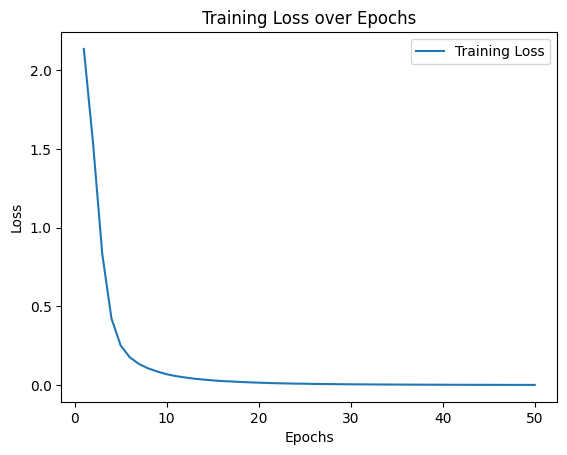

MLP Accuracy: 0.9805555555555555
MLP Precision: 0.9810749030795113
MLP Recall: 0.9805555555555555
MLP Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


NameError: name 'transforms' is not defined

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import torch.nn as nn
import torch.optim as optim

# Load USPS dataset
usps_data = load_digits()

# Separate features and labels
features = usps_data.data
labels = usps_data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
num_classes = 10

mlp_model = MLP(input_size, hidden_size1, hidden_size2, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Training loop for MLP
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Plot training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Evaluate MLP model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predicted.extend(predicted.tolist())
            all_labels.extend(labels.tolist())

    accuracy = correct / total
    precision = precision_score(all_labels, all_predicted, average='weighted')
    recall = recall_score(all_labels, all_predicted, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_predicted)

    return accuracy, precision, recall, conf_matrix

mlp_accuracy, mlp_precision, mlp_recall, mlp_conf_matrix = evaluate_model(mlp_model, test_loader)

print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP Confusion Matrix:")
print(mlp_conf_matrix)

# Define CNN architecture and make changes
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool = nn.MaxPool2d(3, 3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load USPS dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.USPS(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.USPS(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Instantiate the CNN model
cnn_model = CNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Train the CNN model
num_epochs = 20
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
